In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

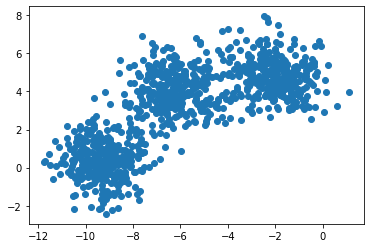

In [74]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.scatter(X[:, 0], X[:, 1])

In [75]:
from sklearn.cluster import KMeans

Initialization complete
Iteration 0, inertia 6814.690893134555
Iteration 1, inertia 5063.945541485721
Iteration 2, inertia 4988.239857915881
Initialization complete
Iteration 0, inertia 6850.868557675507
Iteration 1, inertia 4773.730847740503
Iteration 2, inertia 4770.998294965646


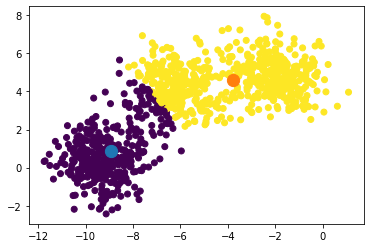

In [135]:
model = KMeans(n_clusters=2, n_init=2, verbose=1, max_iter=3)

model.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
for [xi, yi] in model.cluster_centers_:
    plt.scatter(xi, yi, s=150)

In [124]:
class CustomKMeans:
    
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        
    
    def fit(self, X):
        
        cluster_centers_ = X[np.random.randint(0, X.shape[0], self.n_clusters)]
        
        for it in range(20):
            
            error = 0
            votes = []
            
            for point in X:
                d = np.sqrt(np.power(cluster_centers_ - point, 2).sum(axis=1))
                closest = d.argmin()
                error += d[closest]
                votes.append(closest)
                
            
            votes_arr = np.array(votes)
            for i in range(cluster_centers_.shape[0]):
                cluster_centers_[i] = X[votes_arr==i].mean(axis=0)
                
        
        self.cluster_centers_ = cluster_centers_
        self.labels_ = votes
        
        

In [125]:
model = CustomKMeans(n_clusters=2)

In [126]:
model.fit(X)

In [127]:
model.cluster_centers_

array([[-3.84173962,  4.56907546],
       [-8.97549721,  0.80063979]])

(1000, 2)

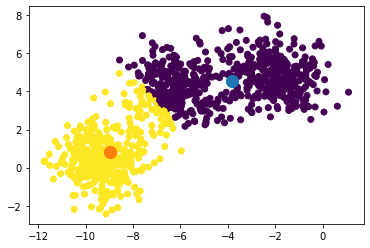

In [134]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
for [xi, yi] in model.cluster_centers_:
    plt.scatter(xi, yi, s=150)